#### setup

In [1]:
import pandas as pd
import numpy as np
import warnings
from itertools import product, combinations
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import itertools
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
def load_df_from_file(verbose=True):
    """
    Load the raw dataset with minor mods
    """
    file_path = './event_labels_1_18_2025_last_N_days.csv'
    data = pd.read_csv(file_path)
    
    if verbose is True:
        print(f"num unique artists - {len(data.act.unique())}")

    # Replace inf and -inf with NaN
    data.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Drop rows with NaN values
    data.dropna(inplace=True)
    
    return data

#### plots from the paper

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


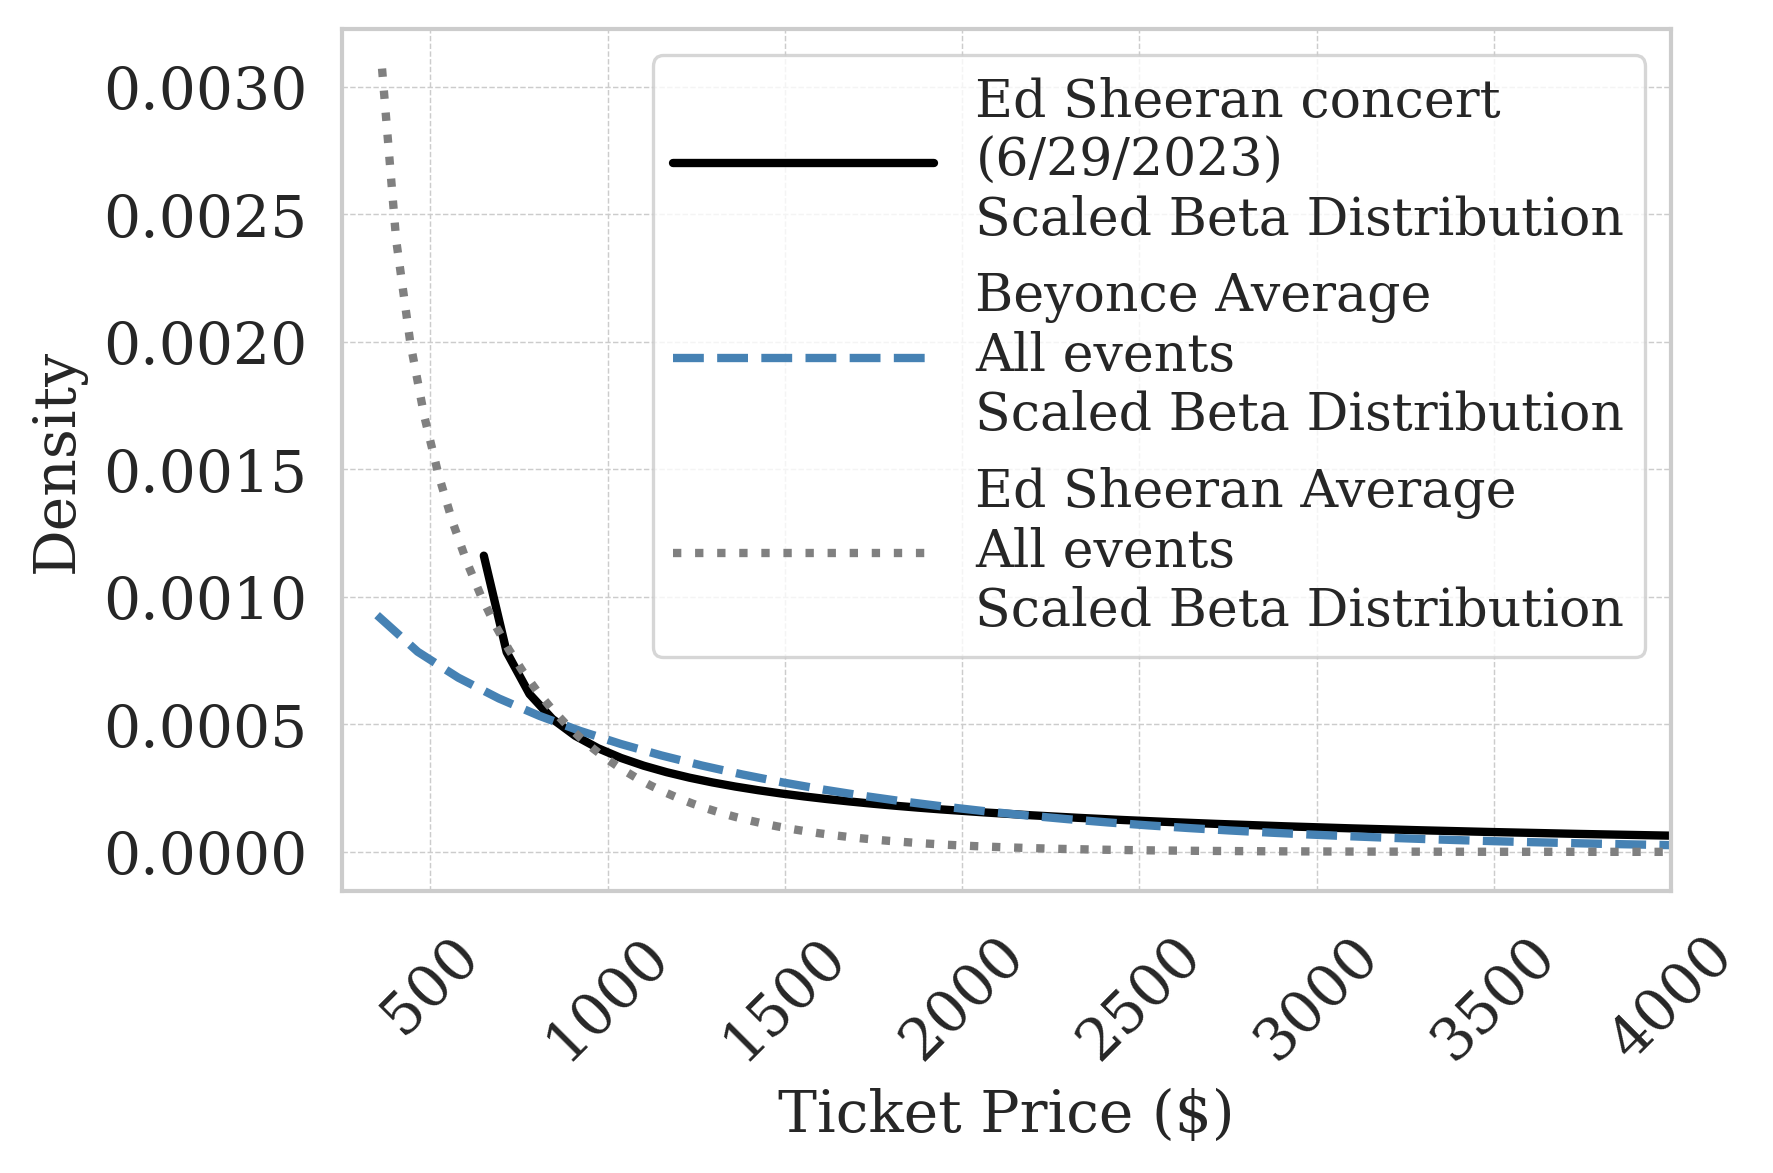

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
from scipy.stats import beta
import seaborn as sns

sns.set(style="whitegrid", context="paper")

#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{lmodern}'
# Use Type 1 fonts in PDFs and set serif fonts for consistency
rcParams['pdf.use14corefonts'] = True  
#plt.rc('text', usetex=True)  # Enable LaTeX for text rendering
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{lmodern}'
plt.rc('font', family='serif')
#plt.rc('font', serif=['Computer Modern Roman'])

fsize = 14

# Define muted blue-gray-black color palette
line_colors = {
    "Event Time Series": "black",
    "Beyonce Average": "#4682B4",
    "Ed Sheeran Average": "grey",
    "Beyonce Median": "#4682B4",
    "Ed Sheeran Median": "grey"
}

# Load full dataset
full_df = load_df_from_file(verbose=False)

# Create subsets:
# 1. Single event time series by event_id
df_event = full_df[full_df.event_id == 6973]

# 2. Averages (mean) for each act
df_bey_avg = full_df[full_df.act == "Beyonce"].groupby("act").mean().reset_index()
df_sheeran_avg = full_df[full_df.act == "Ed Sheeran"].groupby("act").mean().reset_index()

# 3. Medians for each act 
df_bey_med = full_df[full_df.act == "Beyonce"].groupby("act").median().reset_index()
df_sheeran_med = full_df[full_df.act == "Ed Sheeran"].groupby("act").median().reset_index()

# Helper function to plot beta PDFs and add vertical lines for mean and median
def plot_series(ax, data, label, linestyle, color):
    if data.empty:
        return
    # Extract parameters
    mean_val = data.average_price.iloc[0]
    median_val = data.median_price.iloc[0]
    min_value = data.lowest_price.iloc[0]
    max_value = data.highest_price.iloc[0]
    alpha_val = data.alpha.iloc[0]
    beta_val = data.beta.iloc[0]
    
    # Generate x values over the price range and scale appropriately
    x = np.linspace(min_value, max_value, 500)
    scale_factor = max_value - min_value
    x_scaled = (x - min_value) / scale_factor
    
    # Ensure positive alpha and beta values
    alpha_val = max(alpha_val, 0.001)
    beta_val = max(beta_val, 0.001)
    
    # Compute the scaled beta distribution PDF
    pdf_vals = beta.pdf(x_scaled, alpha_val, beta_val) / scale_factor
    
    # Plot the PDF curve
    ax.plot(x, pdf_vals, linestyle=linestyle, color=color, linewidth=2, label=label)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

# Plot each series using distinct line styles for clear differentiation in black and white
plot_series(ax, df_event, f"Ed Sheeran concert\n(6/29/2023)\nScaled Beta Distribution", 
            linestyle='-', color=line_colors["Event Time Series"])
plot_series(ax, df_bey_avg, f"Beyonce Average\nAll events\nScaled Beta Distribution", 
            linestyle='--', color=line_colors["Beyonce Average"])
plot_series(ax, df_sheeran_avg, f"Ed Sheeran Average\nAll events\nScaled Beta Distribution", 
            linestyle=':', color=line_colors["Ed Sheeran Average"])

# Set labels, legend, and grid styling
ax.set_xlabel("Ticket Price ($)", fontsize=fsize)
ax.set_ylabel("Density", fontsize=fsize)
ax.set_xlim(250, 4000)
plt.grid(True, which='both', linestyle='--', linewidth=0.35, alpha=1)
plt.xticks(fontsize=fsize,rotation=45)
plt.yticks(fontsize=fsize)

# To avoid duplicate legend entries, filter them
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=12.5, facecolor='white', frameon=True, handlelength=5)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('beyonce_sheeran_beta_comparison.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


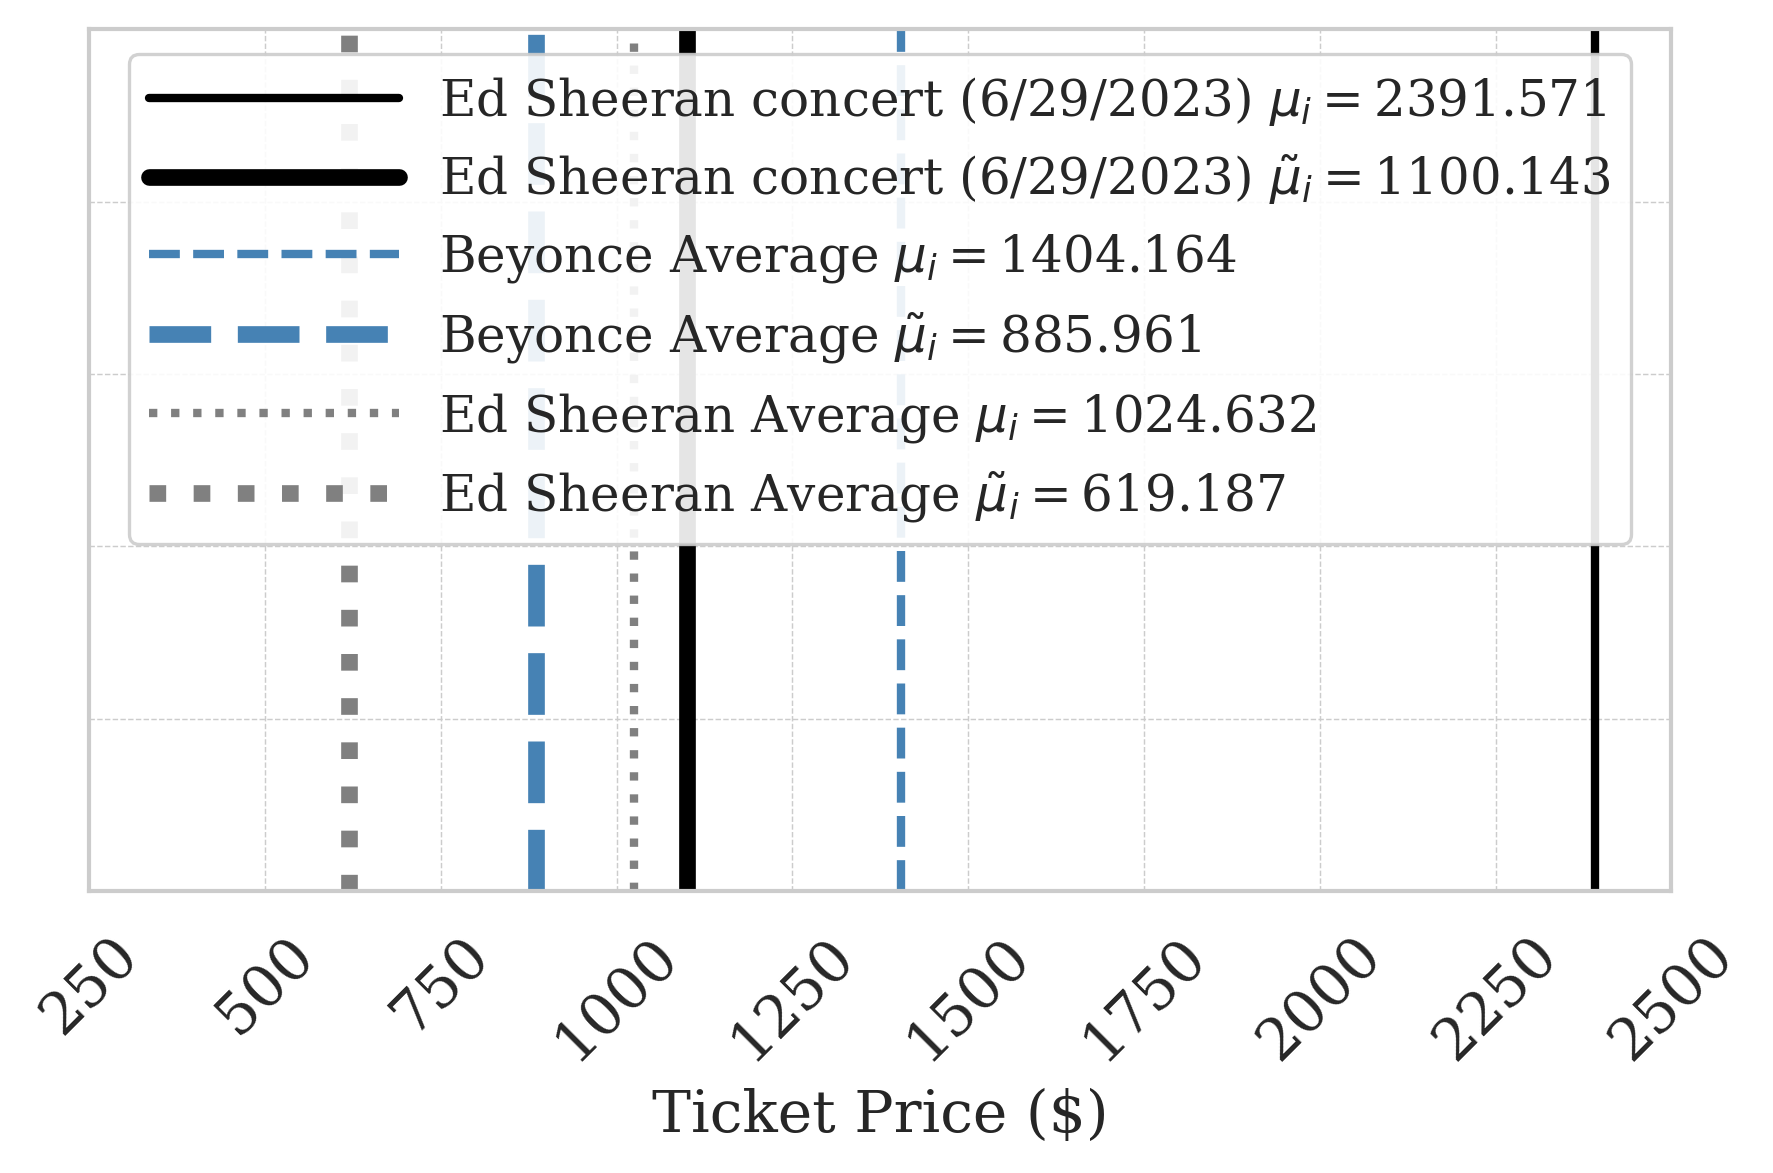

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
from scipy.stats import beta
import seaborn as sns

sns.set(style="whitegrid", context="paper")

#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{lmodern}'
# Use Type 1 fonts in PDFs and set serif fonts for consistency
rcParams['pdf.use14corefonts'] = True  
#plt.rc('text', usetex=True)  # Enable LaTeX for text rendering
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{lmodern}'
plt.rc('font', family='serif')
#plt.rc('font', serif=['Computer Modern Roman'])

fsize = 14

# Define muted blue-gray-black color palette
line_colors = {
    "Event Time Series": "black",
    "Beyonce Average": "#4682B4",
    "Ed Sheeran Average": "grey",
    "Beyonce Median": "#4682B4",
    "Ed Sheeran Median": "grey"
}

# Load full dataset
full_df = load_df_from_file(verbose=False)

# Create subsets:
# 1. Single event time series by event_id
df_event = full_df[full_df.event_id == 6973]

# 2. Averages (mean) for each act
df_bey_avg = full_df[full_df.act == "Beyonce"].groupby("act").mean().reset_index()
df_sheeran_avg = full_df[full_df.act == "Ed Sheeran"].groupby("act").mean().reset_index()

# 3. Medians for each act (if needed)
df_bey_med = full_df[full_df.act == "Beyonce"].groupby("act").median().reset_index()
df_sheeran_med = full_df[full_df.act == "Ed Sheeran"].groupby("act").median().reset_index()

# Helper function to plot beta PDFs and add vertical lines for mean and median
def plot_series(ax, data, label, linestyle, color):
    if data.empty:
        return
    # Extract parameters
    mean_val = data.average_price.iloc[0]
    median_val = data.median_price.iloc[0]
    min_value = data.lowest_price.iloc[0]
    max_value = data.highest_price.iloc[0]
    alpha_val = data.alpha.iloc[0]
    beta_val = data.beta.iloc[0]
    
    # Generate x values over the price range and scale appropriately
    x = np.linspace(min_value, max_value, 500)
    scale_factor = max_value - min_value
    x_scaled = (x - min_value) / scale_factor
    
    # Ensure positive alpha and beta values
    alpha_val = max(alpha_val, 0.001)
    beta_val = max(beta_val, 0.001)
    
    # Compute the scaled beta distribution PDF
    pdf_vals = beta.pdf(x_scaled, alpha_val, beta_val) / scale_factor
    
    # ax.plot(x, pdf_vals, linestyle=linestyle, color=color, linewidth=2, label=label)
    
    # Add vertical lines for average and median of this series
    ax.axvline(mean_val, color=color, linestyle=linestyle, linewidth=2,
               label=f"{label}" + r" $\mu_i = $" + f"{mean_val:.3f}")
    ax.axvline(median_val, color=color, linestyle=linestyle, linewidth=4,
               label=f"{label}" + r" $\tilde{\mu}_{i} = $" + f"{median_val:.3f}")

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

# Plot each series using distinct line styles for clear differentiation in black and white
plot_series(ax, df_event, "Ed Sheeran concert (6/29/2023)", linestyle='-', color=line_colors["Event Time Series"])
plot_series(ax, df_bey_avg, "Beyonce Average", linestyle='--', color=line_colors["Beyonce Average"])
plot_series(ax, df_sheeran_avg, "Ed Sheeran Average", linestyle=':', color=line_colors["Ed Sheeran Average"])
# plot_series(ax, df_bey_med, "Beyonce Median", linestyle='-.', color=line_colors["Beyonce Median"])
# plot_series(ax, df_sheeran_med, "Ed Sheeran Median", linestyle='-.', color=line_colors["Ed Sheeran Median"])

# Set labels, legend, and grid styling
ax.set_xlabel("Ticket Price ($)", fontsize=fsize)
ax.set_ylabel("", fontsize=fsize)
ax.tick_params(axis='y', labelleft=False)  # hides labels but keeps ticks for grid lines

ax.set_xlim(250, 2500)
plt.grid(True, which='both', linestyle='--', linewidth=0.35, alpha=1)

#plt.grid(True, which='none', linestyle='--', linewidth=0.125, alpha=1)
#plt.grid()
plt.xticks(fontsize=fsize,rotation=45)
plt.yticks(fontsize=fsize)

# To avoid duplicate legend entries, filter them
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=12, loc='upper center',
          facecolor='white', frameon=True, handlelength=5, framealpha=.9)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('beyonce_sheeran_stats_comparison.eps', format='eps', dpi=300, bbox_inches='tight')
#plt.grid(True, which='both', linestyle='--', linewidth=0.125, alpha=1)
plt.show()

